# IP Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np

plt.rcParams["figure.figsize"]=15,10 #Set plot size
plt.rcParams.update({'font.size': 16}) #set plot size font
plt.rcParams.update({"axes.grid" : True, "grid.color": "lightgrey"}) #Add grid lines to plot

### Black Box

In [2]:
cols = ['t','V_ms-1','V_knots','Dist','Thrust 1','Thrust 2','Mass']
BB = pd.DataFrame(columns = cols)
BB

,t,V_ms-1,V_knots,Dist,Thrust 1,Thrust 2,Mass


### Other Functions

In [3]:
def Knots(MS):
    return MS / 0.5144

def MS(Knots):
    return Knots * 0.5144

#### Aircraft Parameters

In [4]:
mass = 79000
AbortSpeed = 120 #In Knots

T1 = 106.8 * 1000 #Engine Thrust A320-200 with 2* CFM International LEAP 1A at T/O power (106.80 kN)    ~~TBC~~
T2 = 106.8 * 1000

Decel = 6 #Deceleration of Max Brakes 6ms-2  ~~TBC~~

#### Other Parameters

In [5]:
g = 9.81


In [6]:
V = 0
t = 0
t_step = 1e-3

## Ground Roll

Accelerating along Runway with CONSTANT Thrust


In [7]:
L = 0  # Ground Roll (Zero Lift) {for now}
D_i = 0  # Zero Lift -> Drag = 0   {for now}

mu = 0  # Zero Friction {for now}

W = 9.81 * mass

D_f = mu * (L - W)    #Friction Drag


# N2 : F = m a
#    : F = m dV/dt

def dV(V,t):
    return (T1 + T2 - D_i - D_f)/mass


Wall time: 3.99 s


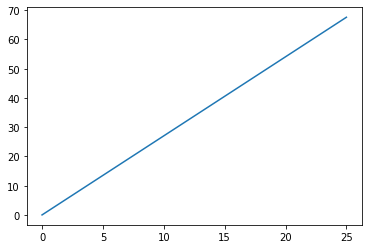

In [8]:
%%time

ts = np.arange(0, 25, 1e-6)

V0 = 0

V = odeint(dV, V0, ts)

plt.plot(ts,V)
plt.grid()

Wall time: 22.4 ms


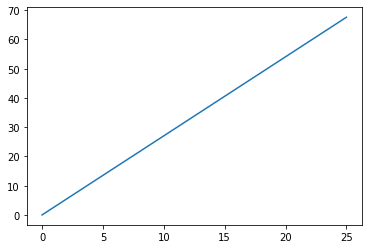

In [9]:
%%time

def dV(t,V):
    return (T1 + T2 - D_i - D_f)/mass

V = solve_ivp(dV,[0,25],[0])

plt.plot(V.t,V.y[0])
plt.grid()

In [10]:
%%time

def dV(t,V,t_a):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

V = solve_ivp(dV,[0,35],[0],args = [25],rtol=1e-9)

plt.plot(V.t,V.y[0])
plt.grid()

C:\Users\willh\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


TypeError: dV() missing 1 required positional argument: 't_a'

In [11]:
%%time

def dV(t,V,t_a):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

def f(t,y,a):
    S = y[0]              # extract r from array y
    V = y[1]              # extract v from array y 
    dSdt = V              # compute right hand side
    dVdt = dV(t,V,a)
    return np.array([dSdt, dVdt]) # return array


# initial conditions
s0 = 0 # initial s
v0 = 0 # initial v

# combine r and v into array y0
y0 = np.array([s0, v0])

S = solve_ivp(f,[0,35],y0,args = [25],rtol=1e-9)

plt.plot(S.t,S.y[0])
plt.grid()

TypeError: f() missing 1 required positional argument: 'a'

In [12]:
%%time

def dV(t,V,t_a):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

def f(t,y,a):
    S = y[0]              # extract r from array y
    V = y[1]              # extract v from array y 
    dSdt = V              # compute right hand side
    dVdt = dV(t,V,a)
    return np.array([dSdt, dVdt]) # return array


# initial conditions
s0 = 0 # initial s
v0 = 0 # initial v

# combine r and v into array y0
y0 = np.array([s0, v0])

S = solve_ivp(f,[0,35],y0,args = [25],rtol=1e-9,max_step=1e-3)

plt.plot(S.t,S.y[0])
plt.grid()

TypeError: f() missing 1 required positional argument: 'a'